# QCTO - Workplace Module

### Project Title: Mapping Global Prosperity by Analyzing Development Indicators for a More Equitable Future







#### Done By: Thabisile Xaba

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** 

This project aims to identify trends and discrepancies in prosperity by analyzing and classifying countries according to important development indices. The project's goal is to map these differences in order to offer insights that can direct international efforts toward promoting a more prosperous and fair future for all countries. It aims to pinpoint problem areas, draw attention to achievements, and provide evidence-based suggestions for sustainable development and policy formulation.


* **Questions we need to answer in order to solve this issue:**
1. Are we making any progress when it comes to the improvement of challenges faced by humanity?
2. If we are, when can we expect them to be met?
3. Which countries are making the fastest progress and which are not?
4. How can we ensure that all countries are moving at the same rate in terms of progress?

* **Background Information:**
Numerous social, economic, and environmental factors influence global development, resulting in notable differences in wealth between countries. While some nations have quickly developed, others still face challenges including political instability, poverty, and inequality. Important development metrics, such as access to electricity, which is crucial for economic growth, and education, are useful for evaluating and comparing progress made globally. This study looks at these metrics to find trends and classify countries according to their level of development. The knowledge acquired can direct international initiatives to support more sustainable and equitable development.



---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [422]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and handling arrays
import matplotlib.pyplot as plt  # For plotting and data visualization
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting the data and cross-validation
from sklearn.preprocessing import StandardScaler  # For scaling the features
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.ensemble import RandomForestRegressor  # For Random Forest regression modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating model performance
import re  # For handling and manipulating regular expressions in text
import pickle  # For saving and loading machine learning models
import mlflow  # For tracking and managing machine learning experiments
import mlflow.sklearn  # For logging sklearn models with MLflow
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ephem
import geocoder
import geopy
from scipy.optimize import curve_fit

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** A ‘global sustainability’ dataset has been put together for the TrueCue Women+Data Hackathon. The dataset tracks the performance of 173 countries against a range of sustainability metrics over a 19-year period.
* **Details:** Taken from https://www.kaggle.com/truecue/worldsustainabilitydataset. Static file download from a range of international organisations such as the UN, the World Bank or Our World in Data. The data dictionary workbook contains the source and URL used for each of the columns. The full dataset was prepared by TrueCue.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [423]:
wsd_df = pd.read_csv('WorldSustainabilityDataset.csv')

This code loads the data from the `WorldSustainabilityDataset.csv` file into a pandas DataFrame named `wsd_df`, which allows you to work with the data easily in Python.

In [424]:
df_copy = wsd_df.copy()

This code creates a copy of our dataset, named `df_copy` to keep the original safe while making changes. This prevents accidental modifications and allows us to experiment freely without losing the original data.

In [425]:
df_copy.head()

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


This code sets display options to show all rows, columns, and full content of each cell, then displays the first few rows of the `wsd_df` DataFrame.

In [426]:
df_copy.shape

(3287, 54)

In [427]:
print(df_copy.isnull().sum())

Country Name                                                                                       0
Country Code                                                                                       0
Year                                                                                               0
Access to electricity (% of population) - EG.ELC.ACCS.ZS                                          94
Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG                 721
Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS       659
Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS                            67
Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS                     193
Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS                            176
Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS               

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [428]:
# list of original columns to keep based on your analysis
original_columns_to_keep = [
    'Country Name',
    'Continent',
    'Year',
    'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
    'Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG',
    'GDP per capita (current US$) - NY.GDP.PCAP.CD',  
    'Urban population (% of total population) - SP.URB.TOTL.IN.ZS',
    'School enrollment, primary (% gross) - SE.PRM.ENRR',
    'School enrollment, secondary (% gross) - SE.SEC.ENRR',
    'Children out of school (% of primary school age) - SE.PRM.UNER.ZS',
    'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
    'Life expectancy at birth, total (years) - SP.DYN.LE00.IN',
    'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
    'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1',
    'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS'
]

# Filter the original DataFrame to keep only the specified columns
filtered_original_df = df_copy.loc[:, original_columns_to_keep]

# Display the filtered DataFrame
print(filtered_original_df)

     Country Name      Continent  Year  \
0           Aruba  North America  2000   
1           Aruba  North America  2001   
2           Aruba  North America  2002   
3           Aruba  North America  2003   
4           Aruba  North America  2004   
...           ...            ...   ...   
3282     Zimbabwe         Africa  2014   
3283     Zimbabwe         Africa  2015   
3284     Zimbabwe         Africa  2016   
3285     Zimbabwe         Africa  2017   
3286     Zimbabwe         Africa  2018   

      Access to electricity (% of population) - EG.ELC.ACCS.ZS  \
0                                             91.660398          
1                                            100.000000          
2                                            100.000000          
3                                            100.000000          
4                                            100.000000          
...                                                 ...          
3282                             

This code creates a new DataFrame called `filtered_original_df` that contains only the original columns that we will be focusing on.

In [429]:
# Define the simplified column names mapping
simplified_column_names = {
    'Country Name': 'Country',
    'Continent': 'Continent',
    'Year': 'Year',
    'Access to electricity (% of population) - EG.ELC.ACCS.ZS': 'Electricity Access (%)',
    'Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG': 'Income Growth (%)',
    'GDP per capita (current US$) - NY.GDP.PCAP.CD': 'GDP per Capita (US$)',
    'Urban population (% of total population) - SP.URB.TOTL.IN.ZS': 'Urban Population (%)',
    'School enrollment, primary (% gross) - SE.PRM.ENRR': 'Primary School Enrollment (%)',
    'School enrollment, secondary (% gross) - SE.SEC.ENRR': 'Secondary School Enrollment (%)',
    'Children out of school (% of primary school age) - SE.PRM.UNER.ZS': 'Children Out of School (%)',
    'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS': 'Women in Parliament (%)',
    'Life expectancy at birth, total (years) - SP.DYN.LE00.IN': 'Life Expectancy (Years)',
    'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes': 'CO2 Emissions (MT)',
    'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1': 'Poverty Rate (%)',
    'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS': 'Renewable Energy (%)'
}

# Filter the original DataFrame to keep only the specified columns
filtered_original_df = df_copy.loc[:, original_columns_to_keep]

# Rename the columns in the filtered DataFrame
filtered_original_df = filtered_original_df.rename(columns=simplified_column_names)

This code creates a dictionary called `simplified_column_names` to map original column names to simpler, more descriptive names.

In [430]:
# Display the renamed filtered DataFrame
filtered_original_df.head()

,Country,Continent,Year,Electricity Access (%),Income Growth (%),GDP per Capita (US$),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Children Out of School (%),Women in Parliament (%),Life Expectancy (Years),CO2 Emissions (MT),Poverty Rate (%),Renewable Energy (%)
0,Aruba,North America,2000,91.660398,NaN,20617.75047,NaN,110.788178,96.516167,1.60268,NaN,NaN,2.378,NaN,0.1753
1,Aruba,North America,2001,100.000000,NaN,20670.36701,46.339,109.440964,97.972870,0.32258,NaN,73.853,2.407,NaN,0.1805
2,Aruba,North America,2002,100.000000,NaN,20436.88713,45.972,111.010834,100.520683,1.81634,NaN,73.937,2.437,NaN,0.1814
3,Aruba,North America,2003,100.000000,NaN,20833.97636,45.606,109.214302,99.091171,3.32156,NaN,74.038,2.561,NaN,0.1846
4,Aruba,North America,2004,100.000000,NaN,22568.37499,45.240,110.839050,97.252441,2.17652,NaN,74.156,2.616,NaN,0.1871


This is how our `filtered_original_df` now looks.

In [431]:
filtered_original_df.shape

(3287, 15)

Our dataset now contains 3287 rows with 15 columns, since we have filtered it to focus only on the columns we'll be using for our analysis.

In [432]:
filtered_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          3287 non-null   object 
 1   Continent                        3285 non-null   object 
 2   Year                             3287 non-null   int64  
 3   Electricity Access (%)           3193 non-null   float64
 4   Income Growth (%)                2566 non-null   float64
 5   GDP per Capita (US$)             3246 non-null   float64
 6   Urban Population (%)             3106 non-null   float64
 7   Primary School Enrollment (%)    2783 non-null   float64
 8   Secondary School Enrollment (%)  2430 non-null   float64
 9   Children Out of School (%)       2225 non-null   float64
 10  Women in Parliament (%)          3062 non-null   float64
 11  Life Expectancy (Years)          3096 non-null   float64
 12  CO2 Emissions (MT)  

The code function `filtered_original_df.info()` provides a summary of the DataFrame, showing the number of rows and columns, column names and data types, non-null counts, and memory usage.

In [433]:
filtered_original_df.isnull().sum()

Country                               0
Continent                             2
Year                                  0
Electricity Access (%)               94
Income Growth (%)                   721
GDP per Capita (US$)                 41
Urban Population (%)                181
Primary School Enrollment (%)       504
Secondary School Enrollment (%)     857
Children Out of School (%)         1062
Women in Parliament (%)             225
Life Expectancy (Years)             191
CO2 Emissions (MT)                    2
Poverty Rate (%)                   1983
Renewable Energy (%)                  0
dtype: int64

Here we are checking for null values and as you can see, columns like `Children Out of School(%)`, `Secondary School Enrollment (%)`, `Income Growth (%)` and `Primary School Enrollment (%)` have quite a high number of missing values. We will address this in the next step as it can be detrimental to our analysis.

In [434]:
# Drop columns that are mostly missing
filtered_original_df.dropna(axis=1, thresh=int(0.5 * len(filtered_original_df)), inplace=True)  # Drop columns with more than 50% missing values

First we remove columns from `filtered_original_df` that have more than 50% missing values, ensuring better data quality and simplifying the analysis by keeping only relevant features.

In [435]:
filtered_original_df.describe()

,Year,Electricity Access (%),Income Growth (%),GDP per Capita (US$),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Children Out of School (%),Women in Parliament (%),Life Expectancy (Years),CO2 Emissions (MT),Renewable Energy (%)
count,3287.000000,3193.000000,2566.000000,3246.000000,3106.000000,2783.000000,2430.000000,2225.000000,3062.000000,3096.000000,3285.000000,3287.000000
mean,2009.000000,79.300662,2.499857,12305.687624,57.264100,103.491620,81.126732,7.579437,17.976712,70.160098,174.646907,32.672923
std,5.478059,30.398748,18.752649,17826.520114,22.687638,12.928410,29.023597,11.310325,11.148749,9.205632,757.653194,29.921274
min,2000.000000,1.270180,-645.655290,90.532429,8.461000,32.356060,6.197350,0.000000,0.000000,40.369000,0.048000,0.000000
25%,2004.000000,62.900000,-0.246761,1270.323291,39.546750,98.819946,64.530386,0.770210,9.821429,65.109000,2.426000,6.835400
50%,2009.000000,98.653969,2.545392,4335.709007,57.450000,102.739548,88.407421,2.972080,16.000000,72.564634,12.621000,22.659800
75%,2014.000000,100.000000,5.545831,15354.662563,75.372500,109.297989,100.199627,9.117340,24.468085,76.572750,72.012000,54.638100
max,2018.000000,100.000000,229.493078,118823.648400,100.000000,150.785553,163.934723,73.104568,63.750000,84.934146,9956.569000,98.342903


`filtered_original_df.describe()` provides summary statistics (like count, mean, min, max, and percentiles) for the numerical columns, helping us understand our data's distribution and central tendency.

In [436]:
# Fill NaN values only in numeric columns with the mean of those columns
filtered_original_df.fillna(filtered_original_df.select_dtypes(include='number').mean(), inplace=True)

# Display the DataFrame to verify the changes
print(filtered_original_df.head())


  Country      Continent  Year  Electricity Access (%)  Income Growth (%)  \
0   Aruba  North America  2000               91.660398           2.499857   
1   Aruba  North America  2001              100.000000           2.499857   
2   Aruba  North America  2002              100.000000           2.499857   
3   Aruba  North America  2003              100.000000           2.499857   
4   Aruba  North America  2004              100.000000           2.499857   

   GDP per Capita (US$)  Urban Population (%)  Primary School Enrollment (%)  \
0           20617.75047               57.2641                     110.788178   
1           20670.36701               46.3390                     109.440964   
2           20436.88713               45.9720                     111.010834   
3           20833.97636               45.6060                     109.214302   
4           22568.37499               45.2400                     110.839050   

   Secondary School Enrollment (%)  Children Out of Scho

We then fill NaN values in numeric columns of `filtered_original_df` with the mean of those columns, then display the first few rows to confirm the changes.

In [437]:
print(filtered_original_df.isnull().sum())

Country                            0
Continent                          2
Year                               0
Electricity Access (%)             0
Income Growth (%)                  0
GDP per Capita (US$)               0
Urban Population (%)               0
Primary School Enrollment (%)      0
Secondary School Enrollment (%)    0
Children Out of School (%)         0
Women in Parliament (%)            0
Life Expectancy (Years)            0
CO2 Emissions (MT)                 0
Renewable Energy (%)               0
dtype: int64


Notice that we still have two missing values but they on a non-numeric column. We will fix this in the next step since it is a column we will be needing.

In [438]:
# Find rows where the 'Continent' column has NaN values
missing_continent_rows = filtered_original_df[filtered_original_df['Continent'].isna()]

# Display the 'Country' and 'Continent' columns for those rows
print(missing_continent_rows[['Country', 'Continent']])


          Country Continent
2945  Timor-Leste       NaN
2946  Timor-Leste       NaN


First we find out the country name of the missing continent names and they are displayed above.

In [439]:
# Replace NaN in the 'Continent' column for Timor-Leste with 'Asia'
filtered_original_df.loc[filtered_original_df['Country'] == 'Timor-Leste', 'Continent'] = 'Asia'

# Verify the change
print(filtered_original_df[filtered_original_df['Country'] == 'Timor-Leste'])

          Country Continent  Year  Electricity Access (%)  Income Growth (%)  \
2945  Timor-Leste      Asia  2000               79.300662           2.499857   
2946  Timor-Leste      Asia  2001               25.600000          15.268206   
2947  Timor-Leste      Asia  2002               23.925289          11.968659   
2948  Timor-Leste      Asia  2003               27.700000         -15.564538   
2949  Timor-Leste      Asia  2004               30.750410           2.499857   
2950  Timor-Leste      Asia  2005               34.145988           2.499857   
2951  Timor-Leste      Asia  2006               37.532433           2.499857   
2952  Timor-Leste      Asia  2007               36.600000           2.499857   
2953  Timor-Leste      Asia  2008               44.302406           2.499857   
2954  Timor-Leste      Asia  2009               47.698406           2.499857   
2955  Timor-Leste      Asia  2010               38.000000           2.499857   
2956  Timor-Leste      Asia  2011       

We then fill the missing continent names as Asia, after doing a bit of Research and finding out that the country Timor-Leste is categorised as being under the Asian continent.

In [440]:
filtered_original_df.drop_duplicates(inplace=True)

After addressing missing values, we then remove duplicates as these can skew our analysis.

In [441]:
# Check for duplicates in the DataFrame
duplicates = filtered_original_df.duplicated()

# Display the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Optionally, display the duplicate rows
if num_duplicates > 0:
    print(filtered_original_df[duplicates])


Number of duplicate rows: 0


Here we double check if duplicates have actually been removed.

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


### Number of Unique Countries by Continent
By displaying patterns in global diversity, this graphic helps in our understanding of how distinct countries are distributed among continents. It draws attention to:

1. **Geopolitical Insights**: Talk about international relations and regional dynamics can benefit from knowing how many countries are in each continent.

2. **Resource Allocation**: Using this data, organizations and policymakers may efficiently address local needs and distribute resources.

3. **Trend Analysis**: Trends in nation-building, conflict, and globalization can be found by tracking the number of countries over time.

All in all, it paints a more accurate picture of why our data is the way it is.


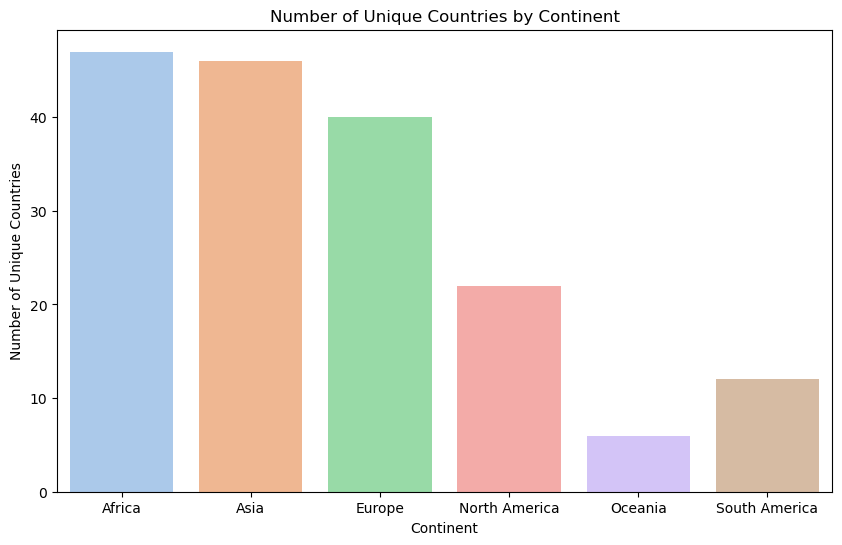

In [442]:
# Count unique countries per continent
country_counts_by_continent = filtered_original_df.groupby('Continent')['Country'].nunique()

# Create a bar plot for the number of unique countries by continent
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts_by_continent.index, y=country_counts_by_continent.values, palette='pastel')
plt.title('Number of Unique Countries by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Unique Countries')
plt.show()

#### Key Observations:

* Africa has the highest number of unique countries, followed by Asia.
* Oceania and South America have the lowest numbers of unique countries.
* Europe and North America have a moderate number of unique countries.

#### Possible reasons for these observations:

Africa has the highest number of unique countries due to its colonial history and ethnic diversity, followed by Asia for similar reasons. Oceania and South America have fewer countries because of smaller land areas and historical consolidation. Europe and North America have moderate counts, shaped by shifting borders and larger nations. Overall, historical, geographical, and cultural factors influence the number of unique countries in each continent.

### **Trend Analysis for the Different Indicators**
###### *NB.co2 emmissions and life expectancy have been excluded due to the difference in units.*

In [443]:
import plotly.graph_objects as go

# Define the indicators as a list
indicators = [
    "Electricity Access (%)",
    "Urban Population (%)",
    "Income Growth (%)",
    "Primary School Enrollment (%)",
    "Secondary School Enrollment (%)",
    "Children Out of School (%)",
    "Women in Parliament (%)",
    "Renewable Energy (%)"
]

# Create an empty figure
fig = go.Figure()

# Add a trace for each indicator to the same chart
for indicator in indicators:
    grouped_df = filtered_original_df.groupby("Continent")[indicator].mean().reset_index()
    
    # Add line plot for each indicator
    fig.add_trace(go.Scatter(
        x=grouped_df["Continent"],
        y=grouped_df[indicator],
        mode='lines+markers',  # Use lines and markers
        name=indicator,
        line=dict(width=2)  # Set the line width
    ))

# Update layout for the chart
fig.update_layout(
    title="Average Indicators per Continent",
    yaxis_title="Value",
    xaxis_title="Continent",
    height=700,  # Increase height for better spacing
    width=1200,  # Increase width for better spacing
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins for more space
)

# Show the plot
fig.show()


#### **Observations**

**Regional Differences:** There are clear regional variations in the average values of the development indicators. Some continents consistently score higher or lower than others across multiple indicators.

**Trends:** Some indicators show increasing or decreasing trends across continents. For example, electricity access, primary school enrollment, and secondary school enrollment tend to increase from Africa to North America.

**Outliers:** There are a few outliers, where a continent's value for a particular indicator is significantly different from the general trend.

#### **Specific Observations:**

**Electricity Access:** North America and Europe have the highest average electricity access, while Africa has the lowest.

**Urban Population:** North America has the highest average urban population, followed by Europe and Asia. Africa has the lowest.

**Income Growth:** Asia and North America have the highest average income growth, while Africa has the lowest.

**Education:** Primary and secondary school enrollment are generally higher in North America, Europe, and Oceania compared to Africa and Asia.

**Children Out of School:** Africa has the highest average percentage of children out of school, while North America and Europe have the lowest.

**Women in Parliament:** Oceania has the highest average percentage of women in parliament, followed by Europe and North America. Africa has the lowest.

**Renewable Energy:** Europe has the highest average renewable energy use, followed by North America and Oceania. Africa has the lowest.

In [444]:
indicators = {
    "Electricity Access (%)": "Electricity Access (%)",
    "GDP per Capita (US$)": "GDP per Capita (US$)",
    "Urban Population (%)": "Urban Population (%)",
    "Life Expectancy (Years)": "Life Expectancy (Years)",
    "Income Growth (%)": "Income Growth (%)",
    "Primary School Enrollment (%)": "Primary School Enrollment (%)",
    "Secondary School Enrollment (%)": "Secondary School Enrollment (%)",
    "Children Out of School (%)": "Children Out of School (%)",
    "Women in Parliament (%)": "Women in Parliament (%)",
    "CO2 Emissions (MT)": "CO2 Emissions (MT)",
    "Renewable Energy (%)": "Renewable Energy (%)"
}
# Calculate number of rows needed (2 per row)
num_indicators = len(indicators)
num_rows = (num_indicators + 1) // 2  # Use ceiling division to get rows

# Create subplots with 2 columns
fig = make_subplots(rows=num_rows, cols=2, subplot_titles=list(indicators.keys()))

# Add a trace for each indicator with expanded square bars
for i, indicator in enumerate(indicators.keys()):
    grouped_df = filtered_original_df.groupby("Continent")[indicator].mean().reset_index()
    
    # Add bar plot for each indicator
    fig.add_trace(go.Bar(
        x=grouped_df["Continent"],
        y=grouped_df[indicator],
        name=indicator,
        width=0.4  # Increase the width of the bars
    ), row=(i // 2) + 1, col=(i % 2) + 1)

# Update layout for the chart
fig.update_layout(
    title="Average Indicators per Continent",
    yaxis_title="Value",
    showlegend=False,  # Hide legend since it's clear from titles
    height=700,  # Increase height for better spacing
    width=1200,  # Increase width for better spacing
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins for more space
)

# Adjust spacing between subplots
fig.update_layout(yaxis=dict(title='Value', automargin=True))

# Show the plot
fig.show()

#### **Observations**
**Regional Disparities:** There are significant regional disparities in the average values of the development indicators. Some continents consistently score higher or lower than others across multiple indicators.

**Outliers:** A few outliers can be observed, where a continent's value for a particular indicator is significantly different from the general trend.

#### **Specific Observations:**

**Electricity Access:** North America and Europe have the highest average electricity access, while Africa has the lowest. This is because they have better infrastructure, while Africa lacks adequate energy systems. Stable economies prioritize energy access; Africa faces economic challenges.

**GDP per Capita:** North America has the highest average GDP per capita, followed by Europe and Oceania. Africa has the lowest. This could be due to North America's history of industrialization, whereas Africa relies on primary commodities and faces instability.

**Urban Population:** North America has the highest average urban population, followed by Europe and Asia. Africa has the lowest as it is still largely rural.

**Life Expectancy:** Oceania has the highest average life expectancy, followed by North America and Europe. Africa has the lowest. Advanced healthcare systems in Oceania, North America, and Europe lead to longer life expectancy, unlike in Africa, where healthcare is limited.

**Income Growth:** Asia and North America have the highest average income growth, while Africa has the lowest. Huge growth in Asia and North America contrasts with stagnant economies in Africa, hindered by conflicts.

**Education:** Primary and secondary school enrollment are generally higher in North America, Europe, and Oceania compared to Africa and Asia. North America and Europe have established systems; Africa and parts of Asia face barriers like poverty and gender inequality.

**Children Out of School:** Africa has the highest average percentage of children out of school, while North America and Europe have the lowest. High out-of-school rates in Africa stem from poverty, conflict, and cultural barriers, unlike in North America and Europe.

**Women in Parliament:** Oceania has the highest average percentage of women in parliament, followed by Europe and North America. Africa has the lowest. Oceania, Europe, and North America promote gender equality; many African countries face cultural and systemic barriers.

**CO2 Emissions:** North America has the highest average CO2 emissions, followed by Asia and Europe. Africa has the lowest. High emissions in North America are linked to industrialization, while Africa's lower emissions reflect limited industrialization.

**Renewable Energy:** Europe has the highest average renewable energy use, followed by North America and Oceania. Africa has the lowest. Europe leads in renewable energy due to strong policies; Africa lacks investment and infrastructure for development.

### **Scatterplot Correlation Matrix**

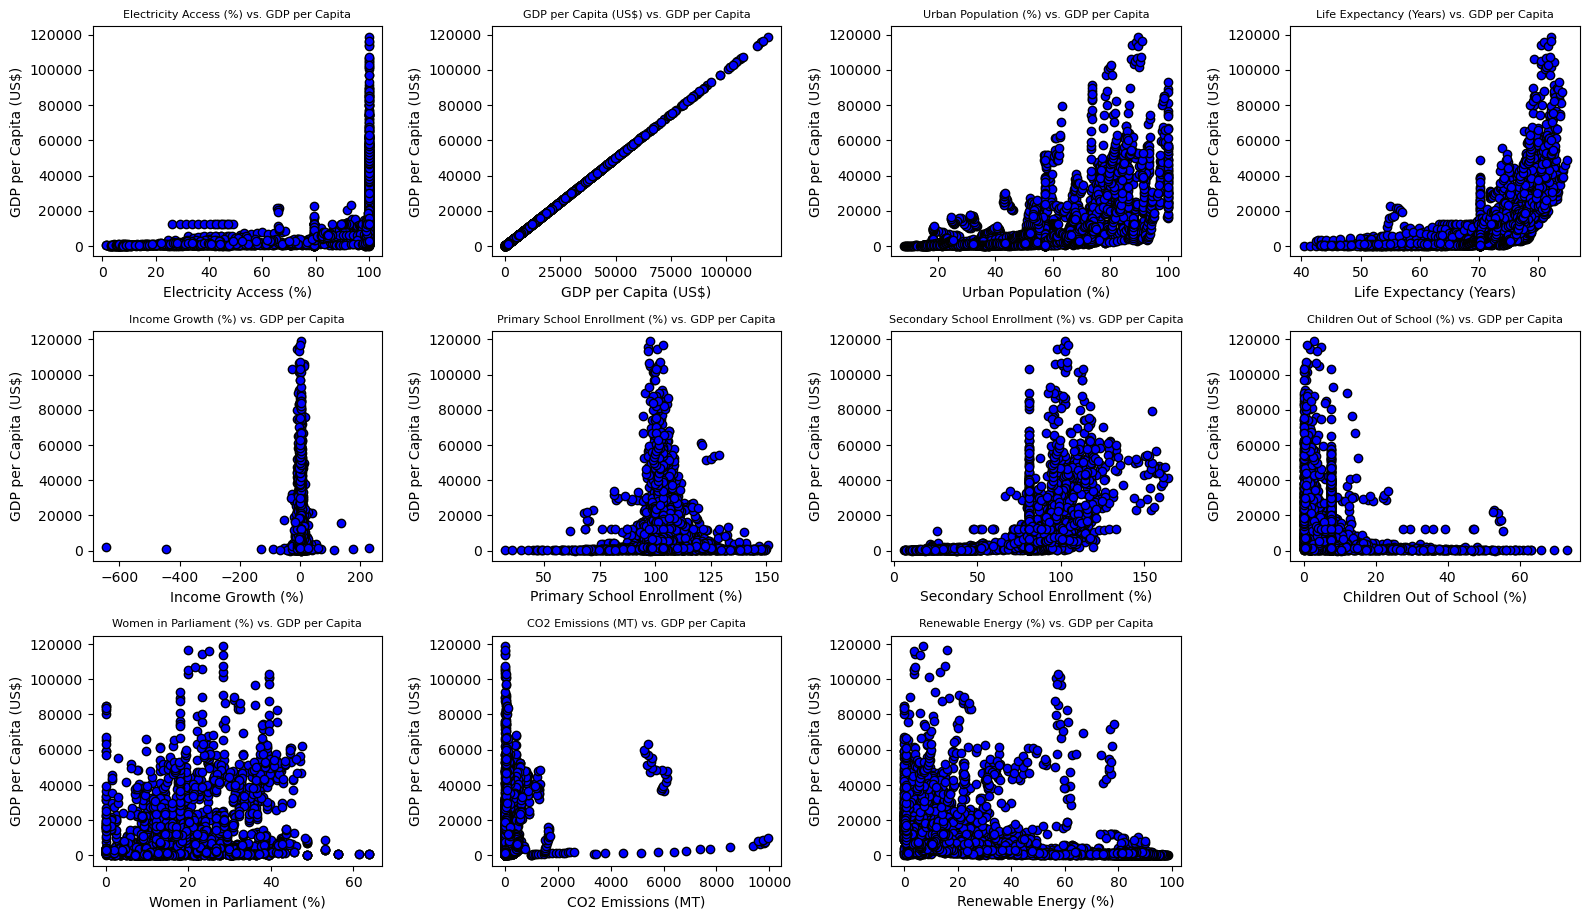

In [445]:
import os
import matplotlib.pyplot as plt

# Define the indicators as a list
indicators = [
    "Electricity Access (%)",
    "GDP per Capita (US$)",
    "Urban Population (%)",
    "Life Expectancy (Years)",
    "Income Growth (%)",
    "Primary School Enrollment (%)",
    "Secondary School Enrollment (%)",
    "Children Out of School (%)",
    "Women in Parliament (%)",
    "CO2 Emissions (MT)",
    "Renewable Energy (%)"
]

# Create a figure with subplots
fig, axs = plt.subplots(6, 4, figsize=(16, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axs = axs.ravel()  # Flatten the 2D array of axes

# Loop through each indicator and create scatter plots
for index, column in enumerate(indicators):
    axs[index].scatter(x=filtered_original_df[column], 
                       y=filtered_original_df['GDP per Capita (US$)'], 
                       color='blue', edgecolor='k')
    axs[index].set_title(f"{column} vs. GDP per Capita", fontsize=8)
    axs[index].set_xlabel(column)
    axs[index].set_ylabel("GDP per Capita (US$)")

# Hide any unused axes
for i in range(len(indicators), len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()

# Create the 'Visuals' directory if it doesn't exist
output_dir = 'Visuals'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure
plt.savefig(os.path.join(output_dir, 'Correlation_plots.png'))  # Save as a PNG file
plt.show()

### **Analyzing the Scatter Plots**

**Positive Correlations:** A number of the scatter plots show a positive correlation between GDP per capita and the development indicators, suggesting that as GDP per capita increases, these indicators tend to improve.

**Scatter:** Some scatter plots exhibit a significant amount of scatter, indicating that while there may be a general trend, there are also exceptions and individual variations.

**Outliers:** A few outliers can be observed in some plots, which might influence the overall correlation or trend.

#### **Observations:**

**Electricity Access:** There's a strong positive correlation between electricity access and GDP per capita, suggesting that there's link between electricity access and GDP per capita. Countries with higher GDPs generally have better access to electricity, showing how economic growth and reliable energy often go hand in hand.

**Urban Population:** The correlation between urban population and GDP per capita is also positive, but there's more scatter/variation, this indicates that while urbanization often accompanies economic growth, the relationship is not always straightforward.

**Life Expectancy:** A clear positive correlation exists between life expectancy and GDP per capita, suggesting that higher income levels are associated with better health and longer life. This is largely because wealthier countries can invest more in healthcare, providing better access to medical services. Improved income levels also lead to better living conditions, such as access to clean water, nutritious food, and sanitation, all of which contribute to healthier, longer lives.

**Education:** The plots for primary, secondary, and tertiary school enrollment all show positive correlations with GDP per capita, suggesting that as economies grow, education levels tend to rise as well.

**Women in Parliament:** The correlation between women in parliament and GDP per capita is positive but weaker, suggesting that while there's a trend towards greater female representation in government with economic development, the relationship is not as strong.

**CO2 Emissions:** The plot for CO2 emissions and GDP per capita shows a positive correlation, indicating that higher levels of economic activity are often associated with increased greenhouse gas emissions.

**Renewable Energy:** 
The correlation between renewable energy and GDP per capita is also positive, but there's more scatter, suggesting that while economic development can lead to increased investment in renewable energy, the relationship is not always consistent.


#### **Weaker positive correlations**
**Income Growth:** The scatter plot for income growth and GDP per capita shows a weaker positive correlation, with a lot more variation. This suggests that while higher GDP is generally linked to income growth, the relationship isn't as strong or consistent.

#### **Negative correlations**
**Children Out of School:** The plot for children out of school shows a negative correlation with GDP per capita, suggesting that fewer children are likely to be out of school in countries with higher incomes.

#### **Other factors to consider:** 
While many of the scatter plots indicate a correlation between variables, it's crucial to remember that correlation doesn't imply causation. To truly understand the relationships at play, further analysis is needed to establish any causal links. Additionally, other factors beyond GDP per capita may influence these development indicators, including government policies, cultural influences, and historical contexts.

Correlation of features with GDP per Capita (US$):
 GDP per Capita (US$)               1.00
Urban Population (%)               0.59
Life Expectancy (Years)            0.58
Secondary School Enrollment (%)    0.50
Electricity Access (%)             0.42
Women in Parliament (%)            0.28
CO2 Emissions (MT)                 0.11
Income Growth (%)                 -0.03
Primary School Enrollment (%)     -0.05
Children Out of School (%)        -0.27
Renewable Energy (%)              -0.36
Name: GDP per Capita (US$), dtype: float64


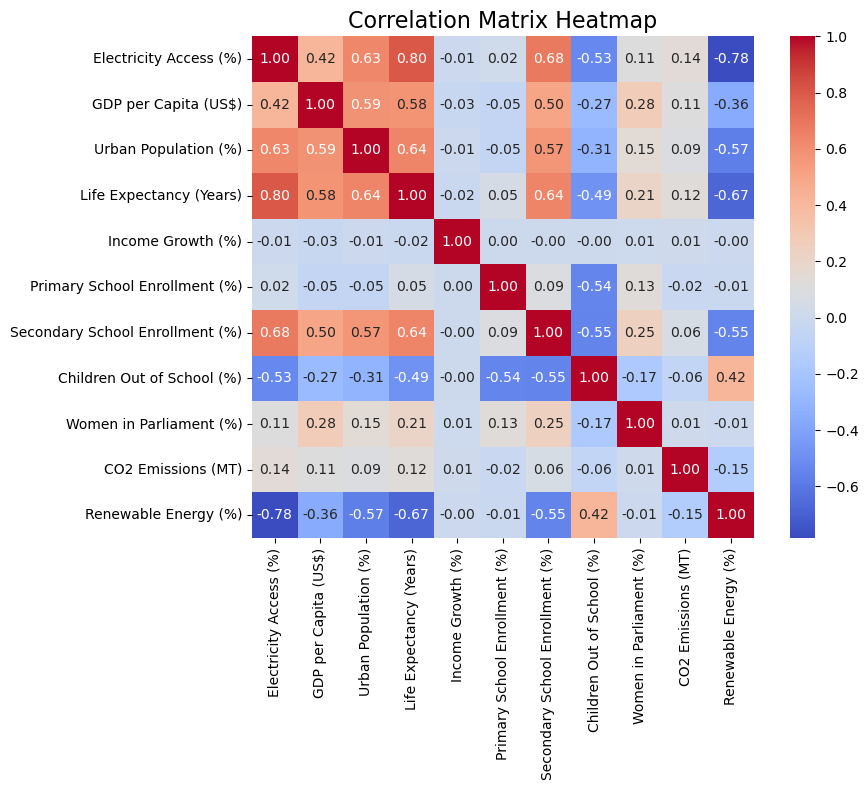

In [454]:
# Define the indicators as a list
indicators = [
    "Electricity Access (%)",
    "GDP per Capita (US$)",
    "Urban Population (%)",
    "Life Expectancy (Years)",
    "Income Growth (%)",
    "Primary School Enrollment (%)",
    "Secondary School Enrollment (%)",
    "Children Out of School (%)",
    "Women in Parliament (%)",
    "CO2 Emissions (MT)",
    "Renewable Energy (%)"
]

# Create a list of columns to correlate
columns_to_correlate = indicators  # Use the 'indicators' list

# Calculate the correlation matrix
correlation_matrix = filtered_original_df[columns_to_correlate].corr()

# Print the correlation with GDP per Capita
correlation_with_target = round(correlation_matrix.loc[:, 'GDP per Capita (US$)'].sort_values(ascending=False), 2)
print("Correlation of features with GDP per Capita (US$):\n", correlation_with_target)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=indicators, yticklabels=indicators, square=True)

# Title and layout adjustments
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()

# Save the figure
plt.savefig('Visuals/Correlation_Heatmap.png')  # Save as a PNG file
plt.show()  # Display the heatmap


In this corrrelation matrix heatmap, it can be observed that 

Strong Positive Correlations: Several variables exhibit strong positive correlations, indicating that they tend to move in the same direction. For example, electricity access, GDP per capita, urban population, and life expectancy show strong positive correlations with each other.
Strong Negative Correlations: Some variables have strong negative correlations, suggesting that they tend to move in opposite directions. For instance, children out of school and renewable energy have strong negative correlations with electricity access and GDP per capita.
Moderate Correlations: Many other variables show moderate positive or negative correlations, indicating that there are relationships between them, but they are not as strong as the extreme cases.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [448]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [449]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [450]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [451]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [452]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
